# Statpearl data

In [1]:
!wget https://ftp.ncbi.nlm.nih.gov/pub/litarch/3d/12/statpearls_NBK430685.tar.gz
!mkdir corpus
!mkdir ./corpus/statpearls
!tar -xvzf /content/statpearls_NBK430685.tar.gz -C /content/corpus/statpearls/
!git clone https://github.com/Besutodesuka/MedRAG.git
!python "/content/MedRAG/src/data/statpearls.py"

Streaming output truncated to the last 5000 lines.
statpearls_NBK430685/article-24624.nxml
statpearls_NBK430685/echo_2.jpg
statpearls_NBK430685/article-42970.nxml
statpearls_NBK430685/article-129473.nxml
statpearls_NBK430685/Figure__9.jpg
statpearls_NBK430685/article-25295.nxml
statpearls_NBK430685/article-18410.nxml
statpearls_NBK430685/article-27.nxml
statpearls_NBK430685/article-149630.nxml
statpearls_NBK430685/foramenmag.jpg
statpearls_NBK430685/article-21334.nxml
statpearls_NBK430685/Dyserythropoiesis.jpg
statpearls_NBK430685/ICS_Structure.jpg
statpearls_NBK430685/FORAMEN__LACERUM.jpg
statpearls_NBK430685/Syringomyelia__in__a__patient__with__Hindbrain__herniation.jpg
statpearls_NBK430685/article-36710.nxml
statpearls_NBK430685/candidal__balanoposthitis__in__a__diabetic__SV.jpg
statpearls_NBK430685/article-29308.nxml
statpearls_NBK430685/article-150292.nxml
statpearls_NBK430685/supraorbital__nerve.jpg
statpearls_NBK430685/article-132888.nxml
statpearls_NBK430685/article-32392.nxml


In [3]:
!python "/content/MedRAG/src/data/statpearls.py"

100% 9561/9561 [00:21<00:00, 445.47it/s]


In [4]:
# prompt: read data inside "/content/corpus/statpearls/chunk" which is collection of jsonl file in pola dataframe

import os
import json
import pandas as pd
from tqdm import tqdm

def read_jsonl_to_dataframe(directory):
  """Reads all JSONL files in a directory into a single pandas DataFrame.

  Args:
    directory: The path to the directory containing the JSONL files.

  Returns:
    A pandas DataFrame containing the data from all JSONL files, or None if an error occurs.
  """
  all_data = []
  for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".jsonl"):
      filepath = os.path.join(directory, filename)
      try:
        with open(filepath, 'r') as f:
          for line in f:
            try:
              data = json.loads(line)
              all_data.append(data)
            except json.JSONDecodeError as e:
              print(f"Error decoding JSON in file {filepath}, line: {line.strip()}: {e}")
      except Exception as e:
        print(f"Error reading file {filepath}: {e}")
  if all_data:
    return pd.DataFrame(all_data)
  else:
    return None

# Example usage:
directory_path = "/content/corpus/statpearls/chunk"
df = read_jsonl_to_dataframe(directory_path)

if df is not None:
  print(f"DataFrame shape: {df.shape}")
  # Now you can work with the DataFrame 'df'
  # For example, display the first few rows:
  print(df.head())
else:
  print(f"No data found in {directory_path}, or all JSONL files were empty.")


100%|██████████| 9559/9559 [00:03<00:00, 2834.52it/s]


DataFrame shape: (334231, 4)
                id                                              title  \
0  article-26702_0         Neuroanatomy, Pars Nervosa -- Introduction   
1  article-26702_1  Neuroanatomy, Pars Nervosa -- Structure and Fu...   
2  article-26702_2  Neuroanatomy, Pars Nervosa -- Structure and Fu...   
3  article-26702_3           Neuroanatomy, Pars Nervosa -- Embryology   
4  article-26702_4  Neuroanatomy, Pars Nervosa -- Blood Supply and...   

                                             content  \
0  The pars nervosa is a neuroendocrine structure...   
1  The pars nervosa, in conjunction with the infu...   
2  The two hormones released in the pars nervosa ...   
3  The pars nervosa originates from neuroectoderm...   
4  The pars nervosa is supplied primarily by the ...   

                                            contents  
0  Neuroanatomy, Pars Nervosa -- Introduction. Th...  
1  Neuroanatomy, Pars Nervosa -- Structure and Fu...  
2  Neuroanatomy, Pars Nervosa 

In [5]:
df.to_csv("statpearls.csv")

# Pubmed

# Textbook

# Join data

# indexing

In [2]:
!pip install -q faiss-cpu
!pip install -q sentence-transformers
!pip install -q nltk
!pip install -q tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.1 MB/s eta 0:00:00


In [90]:
import faiss
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
import nltk
import numpy as np
import torch

In [13]:
# Download required NLTK tokenizer data
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [103]:
class Chunker:
  def __init__(self, max_words=100, overlap_words=20, embed_model = "", batch_size=32) -> None:
    device = "cuda" if torch.cuda.is_available() else "cpu"
    self.model = SentenceTransformer(embed_model, device=device)
    self.max_words = max_words
    self.overlap_words = overlap_words
    self.batch_size = batch_size
    self.all_chunks = None
    self.metadata = None

  def chunk_text(self, text):
      """
      Splits a text into overlapping chunks.

      - Tokenizes the text into sentences.
      - Combines sentences until the chunk reaches max_words.
      - Overlaps the last `overlap_words` from the previous chunk with the next chunk.
      """
      sentences = nltk.sent_tokenize(text)
      chunks = []
      current_chunk = []
      current_word_count = 0

      for sentence in sentences:
          sentence_words = sentence.split()
          sentence_word_count = len(sentence_words)

          # If adding this sentence stays under the max_words threshold, add it.
          if current_word_count + sentence_word_count <= self.max_words:
              current_chunk.append(sentence)
              current_word_count += sentence_word_count
          else:
              # Finalize the current chunk.
              chunk_text = " ".join(current_chunk)
              chunks.append(chunk_text)

              # Create overlap: take last overlap_words from current_chunk.
              all_words = chunk_text.split()
              overlap = all_words[-self.overlap_words:] if len(all_words) >= self.overlap_words else all_words
              # Start a new chunk with the overlap + current sentence.
              current_chunk = [" ".join(overlap), sentence]
              current_word_count = len(overlap) + sentence_word_count

      # Append any remaining text as a chunk.
      if current_chunk:
          chunks.append(" ".join(current_chunk))
      return chunks

  def set_batch_size(self, batch_size):
    self.batch_size = batch_size

  def chunk(self, texts):
    # Step 1: Chunking with progress tracking
    if self.all_chunks == None:
      all_chunks = []
      metadata = []  # to keep track of which text and chunk this came from
      for i, text in enumerate(tqdm(texts, desc="Chunking texts")):
          chunks = self.chunk_text(text)
          for chunk in chunks:
              all_chunks.append(chunk)
              metadata.append({"text_index": i, "chunk": chunk})

      self.all_chunks = all_chunks
      self.metadata = metadata
    return self.all_chunks, self.metadata

  def pipeline(self, texts):
      """
      Full pipeline:
        1. Chunking texts with overlapping boundaries.
        2. Getting embeddings from a Hugging Face model.
        3. Indexing embeddings using FAISS.

      Args:
        texts (List[str]): List of raw text documents.
        max_words (int): Maximum words per chunk.
        overlap_words (int): Number of overlapping words between chunks.
        model_name (str): Hugging Face model to use for embeddings.

      Returns:
        index (faiss.Index): FAISS index populated with embeddings.
        chunk_metadata (List[dict]): Metadata mapping each index entry to its original chunk and source text index.
      """
      # Step 1: Chunking with progress tracking
      if self.all_chunks == None:
        self.chunk(texts)

      # Step 2: Get embeddings from a Hugging Face model
      # embeddings = []
      # for chunk in tqdm(all_chunks, desc="Embedding chunks"):
      #     emb = self.model.encode(chunk, batch_size=self.batch_size, convert_to_numpy=True)
      #     embeddings.append(emb)
      # embeddings = np.vstack(embeddings)

      embeddings = self.model.encode(
            self.all_chunks,
            batch_size=self.batch_size,
            convert_to_numpy=True,
            show_progress_bar=True
      )

      # Step 3: Create a FAISS index
      dimension = embeddings.shape[1]
      index = faiss.IndexFlatL2(dimension)
      index.add(embeddings)

      return index, self.metadata

In [92]:
# # Example usage:
# if __name__ == "__main__":
#     # Sample list of texts to ingest
#     texts = [
#         "Artificial intelligence is transforming the world. It has applications in healthcare, finance, and technology. Researchers are constantly improving models.",
#         "Machine learning is a subset of AI. It involves algorithms that learn from data. Deep learning is a powerful approach to build these models.",
#     ]

#     indexer = Chunker(embed_model="BAAI/bge-m3", max_words=50, overlap_words=10)

#     faiss_index, chunk_info = indexer.pipeline(texts)

#     print("FAISS index built with {} vectors.".format(faiss_index.ntotal))
#     print("Metadata for chunks:")
#     for info in chunk_info:
#         print(info)

In [93]:
# df.head()

dealing with too short chunk

In [79]:
df["content_len"] = df["contents"].apply(lambda x: len(x.split()))

<Axes: xlabel='content_len'>

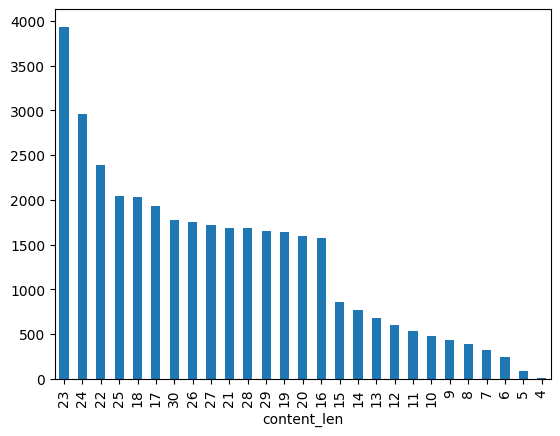

In [80]:
df[df["content_len"] <= 30]["content_len"].value_counts().plot.bar()

In [83]:
df[df["content_len"] <= 23][:10].values

array([['article-26702_16',
        'Neuroanatomy, Pars Nervosa -- Review Questions',
        'Access free multiple choice questions on this topic. Comment on this article.',
        'Neuroanatomy, Pars Nervosa -- Review Questions. Access free multiple choice questions on this topic. Comment on this article.',
        18],
       ['article-140081_16',
        'Lens-Induced Glaucoma -- Evaluation -- Clinical Examination',
        'Ocular adnexa: Possible swelling and redness of the eyelids',
        'Lens-Induced Glaucoma -- Evaluation -- Clinical Examination. Ocular adnexa: Possible swelling and redness of the eyelids',
        16],
       ['article-140081_17',
        'Lens-Induced Glaucoma -- Evaluation -- Clinical Examination',
        'Conjunctiva: Congestion and chemosis',
        'Lens-Induced Glaucoma -- Evaluation -- Clinical Examination. Conjunctiva: Congestion and chemosis',
        11],
       ['article-140081_18',
        'Lens-Induced Glaucoma -- Evaluation -- Clinical Exa

In [57]:
raw_texts = df["contents"].values.tolist()

In [104]:
indexer = Chunker(embed_model="BAAI/bge-m3", max_words=200, overlap_words=50, batch_size= 32)

In [105]:
faiss_index, chunk_info = indexer.pipeline(raw_texts)

Chunking texts: 100%|██████████| 334231/334231 [00:34<00:00, 9595.16it/s]


Batches:   0%|          | 0/10662 [00:00<?, ?it/s]

In [49]:
faiss_index

<faiss.swigfaiss_avx512.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7b51a4b9da10> >

In [50]:
chunk_info

[{'text_index': 0,
  'chunk': 'The pars nervosa is a neuroendocrine structure that, along with the anterior lobe, intermediate lobe, and infundibular stalk, makes up the pituitary gland. This structure lies within the sella turcica, a saddle-shaped indentation in the sphenoid bone that lies posterior to the nasopharynx. The pars nervosa is responsible for the\xa0secretion of the neurohypophysial hormones oxytocin and arginine vasopressin into the systemic circulation. Because these\xa0hormones play important roles in the regulation of blood pressure and osmolarity as well as parturition and lactation, their regulated secretion is\xa0typically considered the primary physiologic function of the pars nervosa. [1]'},
 {'text_index': 1,
  'chunk': 'The pars nervosa, in conjunction with the infundibular stalk, makes up the posterior pituitary gland. The infundibular stalk contains unmyelinated axonal bodies of magnocellular neurosecretory cells originating in the hypothalamus. These neurons 

In [106]:
import faiss
import pickle

def save_index(index, metadata, index_path="faiss_index.bin", metadata_path="metadata.pkl"):
    """
    Saves the FAISS index and metadata to disk.

    Args:
        index (faiss.Index): The FAISS index to save.
        metadata (list): List of metadata dictionaries corresponding to the indexed chunks.
        index_path (str): File path to save the FAISS index.
        metadata_path (str): File path to save the metadata.
    """
    # Save FAISS index to a binary file
    faiss.write_index(index, index_path)
    print(f"FAISS index saved to {index_path}")

    # Save metadata using pickle
    with open(metadata_path, "wb") as f:
        pickle.dump(metadata, f)
    print(f"Metadata saved to {metadata_path}")

def load_index(index_path="faiss_index.bin", metadata_path="metadata.pkl"):
    """
    Loads the FAISS index and metadata from disk.

    Args:
        index_path (str): File path to load the FAISS index from.
        metadata_path (str): File path to load the metadata from.

    Returns:
        index (faiss.Index): The loaded FAISS index.
        metadata (list): The loaded metadata.
    """
    # Load FAISS index from the binary file
    index = faiss.read_index(index_path)
    print(f"FAISS index loaded from {index_path}")

    # Load metadata using pickle
    with open(metadata_path, "rb") as f:
        metadata = pickle.load(f)
    print(f"Metadata loaded from {metadata_path}")

    return index, metadata


In [107]:
# Save the index and metadata
save_index(faiss_index, chunk_info, index_path="faiss_index.bin", metadata_path="metadata.pkl")

FAISS index saved to faiss_index.bin
Metadata saved to metadata.pkl


# Chunk 2 parquet

In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/pub/litarch/3d/12/statpearls_NBK430685.tar.gz
!mkdir corpus
!mkdir ./corpus/statpearls
!tar -xvzf /content/statpearls_NBK430685.tar.gz -C /content/corpus/statpearls/
!git clone https://github.com/Besutodesuka/MedRAG.git

In [ ]:
!python "/content/MedRAG/src/data/statpearls.py"

In [112]:
!curl -X GET "https://huggingface.co/api/datasets/MedRAG/pubmed/parquet/default/train"

["https://huggingface.co/api/datasets/MedRAG/pubmed/parquet/default/train/0.parquet","https://huggingface.co/api/datasets/MedRAG/pubmed/parquet/default/train/1.parquet","https://huggingface.co/api/datasets/MedRAG/pubmed/parquet/default/train/2.parquet","https://huggingface.co/api/datasets/MedRAG/pubmed/parquet/default/train/3.parquet","https://huggingface.co/api/datasets/MedRAG/pubmed/parquet/default/train/4.parquet","https://huggingface.co/api/datasets/MedRAG/pubmed/parquet/default/train/5.parquet","https://huggingface.co/api/datasets/MedRAG/pubmed/parquet/default/train/6.parquet","https://huggingface.co/api/datasets/MedRAG/pubmed/parquet/default/train/7.parquet","https://huggingface.co/api/datasets/MedRAG/pubmed/parquet/default/train/8.parquet","https://huggingface.co/api/datasets/MedRAG/pubmed/parquet/default/train/9.parquet"]

In [ ]:
# prompt: huggingface load dataset

!pip install datasets

from datasets import load_dataset

# Replace 'MedRAG/pubmed' with the actual dataset path on Hugging Face
dataset = load_dataset("MedRAG/pubmed", split="train")

# Now you can work with the dataset object
print(dataset)
print(dataset[0]) # Access the first element


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.


README.md:   0%|          | 0.00/2.56k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/1166 [00:00<?, ?it/s]

pubmed23n0001.jsonl:   0%|          | 0.00/34.2M [00:00<?, ?B/s]

pubmed23n0002.jsonl:   0%|          | 0.00/28.6M [00:00<?, ?B/s]

pubmed23n0003.jsonl:   0%|          | 0.00/25.5M [00:00<?, ?B/s]

pubmed23n0004.jsonl:   0%|          | 0.00/30.3M [00:00<?, ?B/s]

pubmed23n0005.jsonl:   0%|          | 0.00/28.2M [00:00<?, ?B/s]

pubmed23n0006.jsonl:   0%|          | 0.00/36.0M [00:00<?, ?B/s]

pubmed23n0007.jsonl:   0%|          | 0.00/35.7M [00:00<?, ?B/s]

pubmed23n0008.jsonl:   0%|          | 0.00/34.3M [00:00<?, ?B/s]

pubmed23n0009.jsonl:   0%|          | 0.00/10.2M [00:00<?, ?B/s]

pubmed23n0010.jsonl:   0%|          | 0.00/17.6M [00:00<?, ?B/s]

pubmed23n0011.jsonl:   0%|          | 0.00/27.2M [00:00<?, ?B/s]

pubmed23n0012.jsonl:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

pubmed23n0013.jsonl:   0%|          | 0.00/23.6M [00:00<?, ?B/s]

pubmed23n0014.jsonl:   0%|          | 0.00/29.1M [00:00<?, ?B/s]

pubmed23n0015.jsonl:   0%|          | 0.00/26.5M [00:00<?, ?B/s]

pubmed23n0016.jsonl:   0%|          | 0.00/26.8M [00:00<?, ?B/s]

pubmed23n0017.jsonl:   0%|          | 0.00/24.4M [00:00<?, ?B/s]

pubmed23n0018.jsonl:   0%|          | 0.00/21.8M [00:00<?, ?B/s]

pubmed23n0019.jsonl:   0%|          | 0.00/26.4M [00:00<?, ?B/s]

pubmed23n0020.jsonl:   0%|          | 0.00/18.7M [00:00<?, ?B/s]

pubmed23n0021.jsonl:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

pubmed23n0022.jsonl:   0%|          | 0.00/23.8M [00:00<?, ?B/s]

pubmed23n0023.jsonl:   0%|          | 0.00/23.1M [00:00<?, ?B/s]

pubmed23n0024.jsonl:   0%|          | 0.00/23.5M [00:00<?, ?B/s]

pubmed23n0025.jsonl:   0%|          | 0.00/21.5M [00:00<?, ?B/s]

pubmed23n0026.jsonl:   0%|          | 0.00/24.1M [00:00<?, ?B/s]

pubmed23n0027.jsonl:   0%|          | 0.00/32.1M [00:00<?, ?B/s]

pubmed23n0028.jsonl:   0%|          | 0.00/27.9M [00:00<?, ?B/s]

pubmed23n0029.jsonl:   0%|          | 0.00/24.3M [00:00<?, ?B/s]

pubmed23n0030.jsonl:   0%|          | 0.00/22.1M [00:00<?, ?B/s]

pubmed23n0031.jsonl:   0%|          | 0.00/25.7M [00:00<?, ?B/s]

pubmed23n0032.jsonl:   0%|          | 0.00/25.8M [00:00<?, ?B/s]

pubmed23n0033.jsonl:   0%|          | 0.00/25.7M [00:00<?, ?B/s]

pubmed23n0034.jsonl:   0%|          | 0.00/15.4M [00:00<?, ?B/s]

pubmed23n0035.jsonl:   0%|          | 0.00/13.2M [00:00<?, ?B/s]

pubmed23n0036.jsonl:   0%|          | 0.00/23.8M [00:00<?, ?B/s]

pubmed23n0037.jsonl:   0%|          | 0.00/24.7M [00:00<?, ?B/s]

pubmed23n0038.jsonl:   0%|          | 0.00/23.7M [00:00<?, ?B/s]

pubmed23n0039.jsonl:   0%|          | 0.00/26.6M [00:00<?, ?B/s]

pubmed23n0040.jsonl:   0%|          | 0.00/21.3M [00:00<?, ?B/s]

pubmed23n0041.jsonl:   0%|          | 0.00/23.2M [00:00<?, ?B/s]

pubmed23n0042.jsonl:   0%|          | 0.00/33.5M [00:00<?, ?B/s]

pubmed23n0043.jsonl:   0%|          | 0.00/51.1M [00:00<?, ?B/s]

pubmed23n0044.jsonl:   0%|          | 0.00/66.9M [00:00<?, ?B/s]

pubmed23n0045.jsonl:   0%|          | 0.00/54.6M [00:00<?, ?B/s]

pubmed23n0046.jsonl:   0%|          | 0.00/63.9M [00:00<?, ?B/s]

pubmed23n0047.jsonl:   0%|          | 0.00/54.6M [00:00<?, ?B/s]

pubmed23n0048.jsonl:   0%|          | 0.00/52.2M [00:00<?, ?B/s]

pubmed23n0049.jsonl:   0%|          | 0.00/51.6M [00:00<?, ?B/s]

pubmed23n0050.jsonl:   0%|          | 0.00/53.8M [00:00<?, ?B/s]

pubmed23n0051.jsonl:   0%|          | 0.00/56.1M [00:00<?, ?B/s]

pubmed23n0052.jsonl:   0%|          | 0.00/54.6M [00:00<?, ?B/s]

pubmed23n0053.jsonl:   0%|          | 0.00/53.5M [00:00<?, ?B/s]

pubmed23n0054.jsonl:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

pubmed23n0055.jsonl:   0%|          | 0.00/62.2M [00:00<?, ?B/s]

pubmed23n0056.jsonl:   0%|          | 0.00/62.5M [00:00<?, ?B/s]

pubmed23n0057.jsonl:   0%|          | 0.00/66.5M [00:00<?, ?B/s]

pubmed23n0058.jsonl:   0%|          | 0.00/52.8M [00:00<?, ?B/s]

pubmed23n0059.jsonl:   0%|          | 0.00/49.7M [00:00<?, ?B/s]

pubmed23n0060.jsonl:   0%|          | 0.00/46.4M [00:00<?, ?B/s]

pubmed23n0061.jsonl:   0%|          | 0.00/57.7M [00:00<?, ?B/s]

pubmed23n0062.jsonl:   0%|          | 0.00/50.3M [00:00<?, ?B/s]

pubmed23n0063.jsonl:   0%|          | 0.00/57.3M [00:00<?, ?B/s]

pubmed23n0064.jsonl:   0%|          | 0.00/54.0M [00:00<?, ?B/s]

pubmed23n0065.jsonl:   0%|          | 0.00/50.9M [00:00<?, ?B/s]

pubmed23n0066.jsonl:   0%|          | 0.00/53.9M [00:00<?, ?B/s]

pubmed23n0067.jsonl:   0%|          | 0.00/52.7M [00:00<?, ?B/s]

pubmed23n0068.jsonl:   0%|          | 0.00/49.9M [00:00<?, ?B/s]

pubmed23n0069.jsonl:   0%|          | 0.00/47.3M [00:00<?, ?B/s]

pubmed23n0070.jsonl:   0%|          | 0.00/52.7M [00:00<?, ?B/s]

pubmed23n0071.jsonl:   0%|          | 0.00/55.9M [00:00<?, ?B/s]

pubmed23n0072.jsonl:   0%|          | 0.00/63.6M [00:00<?, ?B/s]

pubmed23n0073.jsonl:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

pubmed23n0074.jsonl:   0%|          | 0.00/47.3M [00:00<?, ?B/s]

pubmed23n0075.jsonl:   0%|          | 0.00/50.2M [00:00<?, ?B/s]

pubmed23n0076.jsonl:   0%|          | 0.00/48.4M [00:00<?, ?B/s]

pubmed23n0077.jsonl:   0%|          | 0.00/50.4M [00:00<?, ?B/s]

pubmed23n0078.jsonl:   0%|          | 0.00/50.0M [00:00<?, ?B/s]

pubmed23n0079.jsonl:   0%|          | 0.00/48.5M [00:00<?, ?B/s]

pubmed23n0080.jsonl:   0%|          | 0.00/55.7M [00:00<?, ?B/s]

pubmed23n0081.jsonl:   0%|          | 0.00/60.4M [00:00<?, ?B/s]

pubmed23n0082.jsonl:   0%|          | 0.00/62.9M [00:00<?, ?B/s]

pubmed23n0083.jsonl:   0%|          | 0.00/53.6M [00:00<?, ?B/s]

pubmed23n0084.jsonl:   0%|          | 0.00/57.4M [00:00<?, ?B/s]

pubmed23n0085.jsonl:   0%|          | 0.00/59.4M [00:00<?, ?B/s]

pubmed23n0086.jsonl:   0%|          | 0.00/49.5M [00:00<?, ?B/s]

pubmed23n0087.jsonl:   0%|          | 0.00/45.3M [00:00<?, ?B/s]

pubmed23n0088.jsonl:   0%|          | 0.00/45.9M [00:00<?, ?B/s]

pubmed23n0089.jsonl:   0%|          | 0.00/48.2M [00:00<?, ?B/s]

pubmed23n0090.jsonl:   0%|          | 0.00/47.5M [00:00<?, ?B/s]

pubmed23n0091.jsonl:   0%|          | 0.00/47.0M [00:00<?, ?B/s]

pubmed23n0092.jsonl:   0%|          | 0.00/49.8M [00:00<?, ?B/s]

pubmed23n0093.jsonl:   0%|          | 0.00/52.5M [00:00<?, ?B/s]

pubmed23n0094.jsonl:   0%|          | 0.00/58.4M [00:00<?, ?B/s]

pubmed23n0095.jsonl:   0%|          | 0.00/49.0M [00:00<?, ?B/s]

pubmed23n0096.jsonl:   0%|          | 0.00/46.1M [00:00<?, ?B/s]

pubmed23n0097.jsonl:   0%|          | 0.00/48.6M [00:00<?, ?B/s]

pubmed23n0098.jsonl:   0%|          | 0.00/43.1M [00:00<?, ?B/s]

pubmed23n0099.jsonl:   0%|          | 0.00/51.4M [00:00<?, ?B/s]

pubmed23n0100.jsonl:   0%|          | 0.00/59.3M [00:00<?, ?B/s]

pubmed23n0101.jsonl:   0%|          | 0.00/52.4M [00:00<?, ?B/s]

pubmed23n0102.jsonl:   0%|          | 0.00/35.6M [00:00<?, ?B/s]

pubmed23n0103.jsonl:   0%|          | 0.00/49.1M [00:00<?, ?B/s]

pubmed23n0104.jsonl:   0%|          | 0.00/50.0M [00:00<?, ?B/s]

pubmed23n0105.jsonl:   0%|          | 0.00/38.9M [00:00<?, ?B/s]

pubmed23n0106.jsonl:   0%|          | 0.00/39.9M [00:00<?, ?B/s]

pubmed23n0107.jsonl:   0%|          | 0.00/32.9M [00:00<?, ?B/s]

pubmed23n0108.jsonl:   0%|          | 0.00/34.8M [00:00<?, ?B/s]

pubmed23n0109.jsonl:   0%|          | 0.00/37.0M [00:00<?, ?B/s]

pubmed23n0110.jsonl:   0%|          | 0.00/40.2M [00:00<?, ?B/s]

pubmed23n0111.jsonl:   0%|          | 0.00/39.6M [00:00<?, ?B/s]

pubmed23n0112.jsonl:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

pubmed23n0113.jsonl:   0%|          | 0.00/40.3M [00:00<?, ?B/s]

pubmed23n0114.jsonl:   0%|          | 0.00/36.1M [00:00<?, ?B/s]

pubmed23n0115.jsonl:   0%|          | 0.00/27.1M [00:00<?, ?B/s]

pubmed23n0116.jsonl:   0%|          | 0.00/41.6M [00:00<?, ?B/s]

pubmed23n0117.jsonl:   0%|          | 0.00/40.2M [00:00<?, ?B/s]

pubmed23n0118.jsonl:   0%|          | 0.00/41.0M [00:00<?, ?B/s]

pubmed23n0119.jsonl:   0%|          | 0.00/41.0M [00:00<?, ?B/s]

pubmed23n0120.jsonl:   0%|          | 0.00/40.8M [00:00<?, ?B/s]

pubmed23n0121.jsonl:   0%|          | 0.00/19.6M [00:00<?, ?B/s]

pubmed23n0122.jsonl:   0%|          | 0.00/39.9M [00:00<?, ?B/s]

pubmed23n0123.jsonl:   0%|          | 0.00/39.0M [00:00<?, ?B/s]

pubmed23n0124.jsonl:   0%|          | 0.00/40.4M [00:00<?, ?B/s]

pubmed23n0125.jsonl:   0%|          | 0.00/41.4M [00:00<?, ?B/s]

pubmed23n0126.jsonl:   0%|          | 0.00/41.1M [00:00<?, ?B/s]

pubmed23n0127.jsonl:   0%|          | 0.00/37.3M [00:00<?, ?B/s]

pubmed23n0128.jsonl:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

pubmed23n0129.jsonl:   0%|          | 0.00/39.8M [00:00<?, ?B/s]

pubmed23n0130.jsonl:   0%|          | 0.00/40.0M [00:00<?, ?B/s]

pubmed23n0131.jsonl:   0%|          | 0.00/45.9M [00:00<?, ?B/s]

pubmed23n0132.jsonl:   0%|          | 0.00/44.8M [00:00<?, ?B/s]

pubmed23n0133.jsonl:   0%|          | 0.00/41.8M [00:00<?, ?B/s]

pubmed23n0134.jsonl:   0%|          | 0.00/42.8M [00:00<?, ?B/s]

pubmed23n0135.jsonl:   0%|          | 0.00/39.6M [00:00<?, ?B/s]

pubmed23n0136.jsonl:   0%|          | 0.00/26.8M [00:00<?, ?B/s]

pubmed23n0137.jsonl:   0%|          | 0.00/2.62M [00:00<?, ?B/s]

pubmed23n0138.jsonl:   0%|          | 0.00/2.52M [00:00<?, ?B/s]

pubmed23n0139.jsonl:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

pubmed23n0140.jsonl:   0%|          | 0.00/3.51M [00:00<?, ?B/s]

pubmed23n0141.jsonl:   0%|          | 0.00/1.44M [00:00<?, ?B/s]

pubmed23n0142.jsonl:   0%|          | 0.00/2.23M [00:00<?, ?B/s]

pubmed23n0143.jsonl:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

pubmed23n0144.jsonl:   0%|          | 0.00/4.76M [00:00<?, ?B/s]

pubmed23n0145.jsonl:   0%|          | 0.00/5.41M [00:00<?, ?B/s]

pubmed23n0146.jsonl:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

pubmed23n0147.jsonl:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

pubmed23n0148.jsonl:   0%|          | 0.00/2.19M [00:00<?, ?B/s]

pubmed23n0149.jsonl:   0%|          | 0.00/800k [00:00<?, ?B/s]

pubmed23n0150.jsonl:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

pubmed23n0151.jsonl:   0%|          | 0.00/3.03M [00:00<?, ?B/s]

pubmed23n0152.jsonl:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

pubmed23n0153.jsonl:   0%|          | 0.00/3.06M [00:00<?, ?B/s]

pubmed23n0154.jsonl:   0%|          | 0.00/2.87M [00:00<?, ?B/s]

pubmed23n0155.jsonl:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

pubmed23n0156.jsonl:   0%|          | 0.00/1.70M [00:00<?, ?B/s]

pubmed23n0157.jsonl:   0%|          | 0.00/2.12M [00:00<?, ?B/s]

pubmed23n0158.jsonl:   0%|          | 0.00/1.62M [00:00<?, ?B/s]

pubmed23n0159.jsonl:   0%|          | 0.00/1.02M [00:00<?, ?B/s]

pubmed23n0160.jsonl:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

pubmed23n0161.jsonl:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

pubmed23n0162.jsonl:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

pubmed23n0163.jsonl:   0%|          | 0.00/2.02M [00:00<?, ?B/s]

pubmed23n0164.jsonl:   0%|          | 0.00/2.19M [00:00<?, ?B/s]

pubmed23n0165.jsonl:   0%|          | 0.00/2.55M [00:00<?, ?B/s]

pubmed23n0166.jsonl:   0%|          | 0.00/2.93M [00:00<?, ?B/s]

pubmed23n0167.jsonl:   0%|          | 0.00/1.79M [00:00<?, ?B/s]

pubmed23n0168.jsonl:   0%|          | 0.00/1.62M [00:00<?, ?B/s]

pubmed23n0169.jsonl:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

pubmed23n0170.jsonl:   0%|          | 0.00/1.53M [00:00<?, ?B/s]

pubmed23n0171.jsonl:   0%|          | 0.00/1.09M [00:00<?, ?B/s]

pubmed23n0172.jsonl:   0%|          | 0.00/640k [00:00<?, ?B/s]

pubmed23n0173.jsonl:   0%|          | 0.00/229k [00:00<?, ?B/s]

pubmed23n0174.jsonl:   0%|          | 0.00/54.2k [00:00<?, ?B/s]

pubmed23n0175.jsonl:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

pubmed23n0176.jsonl:   0%|          | 0.00/1.76M [00:00<?, ?B/s]

pubmed23n0177.jsonl:   0%|          | 0.00/2.09M [00:00<?, ?B/s]

pubmed23n0178.jsonl:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

pubmed23n0179.jsonl:   0%|          | 0.00/377k [00:00<?, ?B/s]

pubmed23n0180.jsonl:   0%|          | 0.00/1.45M [00:00<?, ?B/s]

pubmed23n0181.jsonl:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

pubmed23n0182.jsonl:   0%|          | 0.00/1.50M [00:00<?, ?B/s]

pubmed23n0183.jsonl:   0%|          | 0.00/1.81M [00:00<?, ?B/s]

pubmed23n0184.jsonl:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

pubmed23n0185.jsonl:   0%|          | 0.00/1.44M [00:00<?, ?B/s]

pubmed23n0186.jsonl:   0%|          | 0.00/487k [00:00<?, ?B/s]

pubmed23n0187.jsonl:   0%|          | 0.00/674k [00:00<?, ?B/s]

pubmed23n0188.jsonl:   0%|          | 0.00/2.09M [00:00<?, ?B/s]

pubmed23n0189.jsonl:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

pubmed23n0190.jsonl:   0%|          | 0.00/922k [00:00<?, ?B/s]

pubmed23n0191.jsonl:   0%|          | 0.00/182k [00:00<?, ?B/s]

pubmed23n0192.jsonl:   0%|          | 0.00/2.61M [00:00<?, ?B/s]

pubmed23n0193.jsonl:   0%|          | 0.00/1.41M [00:00<?, ?B/s]

pubmed23n0194.jsonl:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

pubmed23n0195.jsonl:   0%|          | 0.00/522k [00:00<?, ?B/s]

pubmed23n0196.jsonl:   0%|          | 0.00/745k [00:00<?, ?B/s]

pubmed23n0197.jsonl:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

pubmed23n0198.jsonl:   0%|          | 0.00/1.57M [00:00<?, ?B/s]

pubmed23n0199.jsonl:   0%|          | 0.00/472k [00:00<?, ?B/s]

pubmed23n0200.jsonl:   0%|          | 0.00/1.41M [00:00<?, ?B/s]

pubmed23n0201.jsonl:   0%|          | 0.00/2.28M [00:00<?, ?B/s]

pubmed23n0202.jsonl:   0%|          | 0.00/12.1M [00:00<?, ?B/s]

pubmed23n0203.jsonl:   0%|          | 0.00/37.4M [00:00<?, ?B/s]

pubmed23n0204.jsonl:   0%|          | 0.00/38.6M [00:00<?, ?B/s]

pubmed23n0205.jsonl:   0%|          | 0.00/40.4M [00:00<?, ?B/s]

pubmed23n0206.jsonl:   0%|          | 0.00/51.3M [00:00<?, ?B/s]

pubmed23n0207.jsonl:   0%|          | 0.00/36.5M [00:00<?, ?B/s]

pubmed23n0208.jsonl:   0%|          | 0.00/40.8M [00:00<?, ?B/s]

pubmed23n0209.jsonl:   0%|          | 0.00/45.8M [00:00<?, ?B/s]

pubmed23n0210.jsonl:   0%|          | 0.00/56.0M [00:00<?, ?B/s]

pubmed23n0211.jsonl:   0%|          | 0.00/40.1M [00:00<?, ?B/s]

pubmed23n0212.jsonl:   0%|          | 0.00/39.8M [00:00<?, ?B/s]

pubmed23n0213.jsonl:   0%|          | 0.00/38.0M [00:00<?, ?B/s]

pubmed23n0214.jsonl:   0%|          | 0.00/41.1M [00:00<?, ?B/s]

pubmed23n0215.jsonl:   0%|          | 0.00/35.8M [00:00<?, ?B/s]

pubmed23n0216.jsonl:   0%|          | 0.00/38.9M [00:00<?, ?B/s]

In [ ]:
# Replace 'MedRAG/pubmed' with the actual dataset path on Hugging Face
tb_dataset = load_dataset("MedRAG/textbooks", split="train")

In [ ]:
# prompt: huggingface dataset from pandas dataframe

from datasets import Dataset

statpearls = pd.read_csv("./statpearls.csv")
# Assuming 'df' is your pandas DataFrame
statpearls_dataset = Dataset.from_pandas(statpearls)

# Now you can work with the Hugging Face dataset object
print(statpearls_dataset)
statpearls_dataset[0]


In [ ]:
# prompt: merge huggingface dataset

from datasets import concatenate_datasets

# Assuming 'dataset' and 'tb_dataset' are already loaded as in your provided code
merged_dataset = concatenate_datasets([,dataset, tb_dataset])

merged_dataset
